In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
type(wine)

sklearn.utils.Bunch

In [4]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target, test_size = .3, 
                 random_state = 42)

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [8]:
pred = knn.predict(X_test)

In [9]:
pred[0]

2

In [10]:
X_test[0]

array([1.364e+01, 3.100e+00, 2.560e+00, 1.520e+01, 1.160e+02, 2.700e+00,
       3.030e+00, 1.700e-01, 1.660e+00, 5.100e+00, 9.600e-01, 3.360e+00,
       8.450e+02])

In [11]:
y_test[0]

0

In [16]:
(y_test == pred).sum()/len(pred)

0.7037037037037037

In [13]:
error = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append((pred_i != y_test).sum())

In [17]:
knn.score(X_test, y_test)

0.7962962962962963

In [14]:
type(error)

list

In [15]:
error

[11,
 16,
 14,
 15,
 14,
 16,
 13,
 15,
 15,
 14,
 14,
 15,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 12,
 11,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 11,
 11,
 11,
 11]

In [18]:
from sklearn import metrics

In [19]:
metrics.precision_score(y_test, pred, average=None)

array([0.73913043, 0.69565217, 0.625     ])

In [20]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.70      0.76      0.73        21
           2       0.62      0.36      0.45        14

    accuracy                           0.70        54
   macro avg       0.69      0.67      0.66        54
weighted avg       0.69      0.70      0.69        54



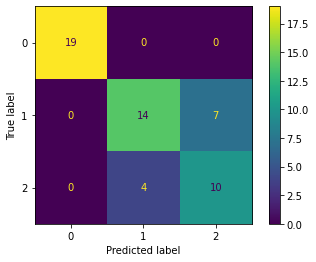

In [22]:
metrics.plot_confusion_matrix(knn, X_test, y_test)